In [36]:
import pandas as pd
import numpy as np

import huggingface_hub
import datasets

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from datetime import datetime, timezone

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# HF Colours
colors = ["#FF9D00", "#FFD21E", "#32343D", '#FF323D']

# Data Loading and Preprocessing

## Load V1

In [4]:
# Load the v1 JSONL file
ds = datasets.load_dataset("open-llm-leaderboard/contents", split="train")
data_v1 = ds.to_pandas()
data_v1.shape

Generating train split:   0%|          | 0/7260 [00:00<?, ? examples/s]

(7260, 26)

In [5]:
# Drop contaminated models
# There are two of them with specific names
data_v1 = data_v1[~data_v1.eval_name.str.contains("contaminated")]

In [6]:
data_v1.shape

(7258, 26)

In [7]:
data_v1.head()

eval_name Precision  \
0                    0-hero_Matter-0.1-7B_bfloat16  bfloat16   
1        0-hero_Matter-0.1-7B-DPO-preview_bfloat16  bfloat16   
2              0-hero_Matter-0.1-7B-boost_bfloat16  bfloat16   
3          0-hero_Matter-0.1-7B-boost-DPO_bfloat16  bfloat16   
4  0-hero_Matter-0.1-7B-boost-DPO-preview_bfloat16  bfloat16   

                                  Type  T Weight type        Architecture  \
0  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
2  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
3  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
4  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   
2  <a target="_blank" href="https://huggingface.c...   
3  <a target="_blank" href="https://huggingface.c...   
4  <a target="_blank" href="https://huggingface.c...   

                                 fullname  \
0                    0-hero/Matter-0.1-7B   
1        0-hero/Matter-0.1-7B-DPO-preview   
2              0-hero/Matter-0.1-7B-boost   
3          0-hero/Matter-0.1-7B-boost-DPO   
4  0-hero/Matter-0.1-7B-boost-DPO-preview   

                                  Model sha  Average ⬆️ Hub License  Hub ❤️  \
0  035c8193ce71be90be7d90098669afb9164ec6cb   63.391248  apache-2.0       0   
1  78040e4754051df49dd907cf1fd46a6b8a6cc30f   64.870290  apache-2.0       0   
2  ba56089eed1211f02e8d0ff47901e77b0cd48f83   63.223517  apache-2.0       0   
3  5bee9978fcf2188f1070b67f6d94be344fdd99c0   65.985858                   0   
4  d390fb35a781129efd26d53f7ecdb513c0c3da27   65.767435  apache-2.0       2   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0            7                  True    True  True     True   
1            7                  True    True  True     True   
2            7                  True    True  True     True   
3            7                 False    True  True     True   
4            7                  True    True  True     True   

                   date  Chat Template        ARC  HellaSwag       MMLU  \
0  2024-03-21T06:05:50Z          False  61.774744  82.135033  62.423731   
1  2024-03-23T04:13:58Z          False  62.713311  82.991436  62.700299   
2  2024-03-21T06:05:38Z          False  62.627986  81.507668  61.967618   
3  2024-03-22T15:02:21Z          False  65.017065  83.081060  61.873805   
4  2024-03-22T07:40:42Z          False  64.590444  82.871938  62.017625   

   TruthfulQA  Winogrande      GSM8K  Maintainers Choice  
0   42.439513   77.821626  53.752843               False  
1   45.790101   78.847672  56.178923               False  
2   54.702404   75.927388  42.608036               False  
3   60.293632   75.611681  50.037908               False  
4   58.859162   75.848461  50.416983               False

In [8]:
# Display V1 columns
columns_v1 = data_v1.columns
print(f"V1 columns: {columns_v1}")

V1 columns: Index(['eval_name', 'Precision', 'Type', 'T', 'Weight type', 'Architecture',
       'Model', 'fullname', 'Model sha', 'Average ⬆️', 'Hub License', 'Hub ❤️',
       '#Params (B)', 'Available on the hub', 'Merged', 'MoE', 'Flagged',
       'date', 'Chat Template', 'ARC', 'HellaSwag', 'MMLU', 'TruthfulQA',
       'Winogrande', 'GSM8K', 'Maintainers Choice'],
      dtype='object')


## Load V2

In [9]:
# Load the v2 JSONL file
ds = datasets.load_dataset("open-llm-leaderboard/contents_v2", split="train")
data_v2 = ds.to_pandas()
data_v2.shape

(203, 32)

In [10]:
data_v2.head()

eval_name Precision  \
0                   upstage_SOLAR-10.7B-v1.0_float16   float16   
1          upstage_SOLAR-10.7B-Instruct-v1.0_float16   float16   
2  togethercomputer_RedPajama-INCITE-Instruct-3B-...   float16   
3  togethercomputer_RedPajama-INCITE-Chat-3B-v1_f...   float16   
4  togethercomputer_RedPajama-INCITE-Base-3B-v1_f...   float16   

                                       Type  T Weight type  \
0                              🟢 pretrained  🟢    Original   
1       💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
2  🔶 fine-tuned on domain-specific datasets  🔶    Original   
3  🔶 fine-tuned on domain-specific datasets  🔶    Original   
4                              🟢 pretrained  🟢    Original   

         Architecture                                              Model  \
0    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
1    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
2  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
3  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
4  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   

                                           fullname  \
0                          upstage/SOLAR-10.7B-v1.0   
1                 upstage/SOLAR-10.7B-Instruct-v1.0   
2  togethercomputer/RedPajama-INCITE-Instruct-3B-v1   
3      togethercomputer/RedPajama-INCITE-Chat-3B-v1   
4      togethercomputer/RedPajama-INCITE-Base-3B-v1   

                                  Model sha  Average ⬆️   Hub License  Hub ❤️  \
0  a45090b8e56bdc2b8e32e46b3cd782fc0bea1fa5   17.072003    apache-2.0     248   
1  c08c25ed66414a878fe0401a3596d536c083606c   19.961989  cc-by-nc-4.0     591   
2  0c66778ee09a036886741707733620b91057909a    5.877290    apache-2.0      91   
3  f0e0995eba801096ed04cb87931d96a8316871af    4.950649    apache-2.0     147   
4  094fbdd0c911feb485ce55de1952ab2e75277e1e    5.645099    apache-2.0      90   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0           10                  True    True  True    False   
1           10                  True    True  True    False   
2            3                  True    True  True    False   
3            3                  True    True  True    False   
4            3                  True    True  True    False   

                   date  Chat Template  IFEval Raw     IFEval   BBH Raw  \
0  2024-06-12T12:27:42Z          False    0.242126  24.212645  0.509387   
1  2024-06-12T12:06:58Z           True    0.473661  47.366100  0.516249   
2  2024-06-12T12:07:46Z          False    0.212426  21.242636  0.314602   
3  2024-06-13T17:58:59Z          False    0.165215  16.521496  0.321669   
4  2024-06-12T12:28:23Z          False    0.229363  22.936254  0.306040   

         BBH  MATH Lvl 5 Raw  MATH Lvl 5  GPQA Raw      GPQA  MUSR Raw  \
0  29.789358        0.021148    2.114804  0.281040  4.138702  0.437156   
1  31.872402        0.000000    0.000000  0.308725  7.829978  0.389937   
2   4.510786        0.006042    0.604230  0.247483  0.000000  0.388604   
3   5.164728        0.003021    0.302115  0.244128  0.000000  0.368448   
4   3.518608        0.009063    0.906344  0.243289  0.000000  0.373875   

        MUSR  MMLU-PRO Raw   MMLU-PRO  Maintainer's Highlight  
0  13.677865      0.340010  26.667775                    True  
1   6.942188      0.313830  23.758865                    True  
2   6.408854      0.110954   1.217125                    True  
3   5.089323      0.112699   1.411052                    True  
4   4.001042      0.111120   1.235594                    True

In [11]:
# Display V2 columns
columns_v2 = data_v2.columns
print(f"V2 columns: {columns_v2}")

V2 columns: Index(['eval_name', 'Precision', 'Type', 'T', 'Weight type', 'Architecture',
       'Model', 'fullname', 'Model sha', 'Average ⬆️', 'Hub License', 'Hub ❤️',
       '#Params (B)', 'Available on the hub', 'Merged', 'MoE', 'Flagged',
       'date', 'Chat Template', 'IFEval Raw', 'IFEval', 'BBH Raw', 'BBH',
       'MATH Lvl 5 Raw', 'MATH Lvl 5', 'GPQA Raw', 'GPQA', 'MUSR Raw', 'MUSR',
       'MMLU-PRO Raw', 'MMLU-PRO', 'Maintainer's Highlight'],
      dtype='object')


## Define Tasks

In [12]:
tasks_v1 = ['ARC', 'HellaSwag', 'MMLU', 'TruthfulQA', 'Winogrande', 'GSM8K']
tasks_v2 = ['IFEval', 'BBH', 'MATH Lvl 5', 'GPQA', 'MUSR', 'MMLU-PRO']
tasks_v2_raw = ['IFEval Raw', 'BBH Raw', 'MATH Lvl 5 Raw', 'GPQA Raw', 'MUSR Raw', 'MMLU-PRO Raw']

## Add Models Creation Date

In [13]:
# version 1
for i, row in data_v1.iterrows():
    try:
        data_v1.at[i, 'date'] = huggingface_hub.model_info(row['fullname']).created_at
    except Exception:
        continue

Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.


In [14]:
data_v1.head(2)

eval_name Precision  \
0              0-hero_Matter-0.1-7B_bfloat16  bfloat16   
1  0-hero_Matter-0.1-7B-DPO-preview_bfloat16  bfloat16   

                                  Type  T Weight type        Architecture  \
0  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   

                           fullname                                 Model sha  \
0              0-hero/Matter-0.1-7B  035c8193ce71be90be7d90098669afb9164ec6cb   
1  0-hero/Matter-0.1-7B-DPO-preview  78040e4754051df49dd907cf1fd46a6b8a6cc30f   

   Average ⬆️ Hub License  Hub ❤️  #Params (B)  Available on the hub  Merged  \
0   63.391248  apache-2.0       0            7                  True    True   
1   64.870290  apache-2.0       0            7                  True    True   

    MoE  Flagged                       date  Chat Template        ARC  \
0  True     True  2024-03-20 05:57:38+00:00          False  61.774744   
1  True     True  2024-03-19 11:27:26+00:00          False  62.713311   

   HellaSwag       MMLU  TruthfulQA  Winogrande      GSM8K  Maintainers Choice  
0  82.135033  62.423731   42.439513   77.821626  53.752843               False  
1  82.991436  62.700299   45.790101   78.847672  56.178923               False

In [15]:
# version 2
for i, row in data_v2.iterrows():
    data_v2.at[i, 'date'] = huggingface_hub.model_info(row['fullname']).created_at

In [16]:
data_v2.head(2)

eval_name Precision  \
0           upstage_SOLAR-10.7B-v1.0_float16   float16   
1  upstage_SOLAR-10.7B-Instruct-v1.0_float16   float16   

                                  Type  T Weight type      Architecture  \
0                         🟢 pretrained  🟢    Original  LlamaForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  LlamaForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   

                            fullname  \
0           upstage/SOLAR-10.7B-v1.0   
1  upstage/SOLAR-10.7B-Instruct-v1.0   

                                  Model sha  Average ⬆️   Hub License  Hub ❤️  \
0  a45090b8e56bdc2b8e32e46b3cd782fc0bea1fa5   17.072003    apache-2.0     248   
1  c08c25ed66414a878fe0401a3596d536c083606c   19.961989  cc-by-nc-4.0     591   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0           10                  True    True  True    False   
1           10                  True    True  True    False   

                        date  Chat Template  IFEval Raw     IFEval   BBH Raw  \
0  2023-12-12 14:57:41+00:00          False    0.242126  24.212645  0.509387   
1  2023-12-12 12:39:22+00:00           True    0.473661  47.366100  0.516249   

         BBH  MATH Lvl 5 Raw  MATH Lvl 5  GPQA Raw      GPQA  MUSR Raw  \
0  29.789358        0.021148    2.114804  0.281040  4.138702  0.437156   
1  31.872402        0.000000    0.000000  0.308725  7.829978  0.389937   

        MUSR  MMLU-PRO Raw   MMLU-PRO  Maintainer's Highlight  
0  13.677865       0.34001  26.667775                    True  
1   6.942188       0.31383  23.758865                    True

# MMLU vs MMLU-Pro V1

In [17]:
mmlu_pro = 'MMLU-PRO' # Raw'
math = 'MATH Lvl 5' # Raw"
gpqa = "GPQA"

# Extracting the relevant information
v1_data = data_v1[['fullname', 'MMLU', 'GSM8K']]
v2_data = data_v2[['fullname', mmlu_pro, math, gpqa]]

# Merging the two dataframes on 'eval_name'
merged_data = pd.merge(v1_data, v2_data, on='fullname', how='inner')

In [18]:
merged_data.head()

fullname       MMLU      GSM8K   MMLU-PRO  MATH Lvl 5  \
0       01-ai/Yi-1.5-34B  77.995719  73.237301  40.732122   14.048338   
1   01-ai/Yi-1.5-34B-32K  78.153032   0.000000  41.212323   13.444109   
2  01-ai/Yi-1.5-34B-Chat  77.082840  71.645186  39.116061   23.338369   
3        01-ai/Yi-1.5-6B  64.726895  50.341168  23.343307    5.664653   
4        01-ai/Yi-1.5-6B  65.002720  49.810462  23.343307    5.664653   

        GPQA  
0  15.436242  
1  15.100671  
2  15.324385  
3   8.277405  
4   8.277405

- MMLU and MMLU_Pro are well correlated - overall, a model with High MMLU has a high MMLU Pro score
- For MATH vs GSM8K, we identify 3 groups:
    - "High" MATH score, very low v1 score (2 outliers): possible overfitting on MATH, or , more likely, one of these models with issues with eos tokens on GSM8K
    - Correlation between v2 and v1 score (most models)
    - Low MATH score, high GSM8K score: likely overfitting on GSM8K

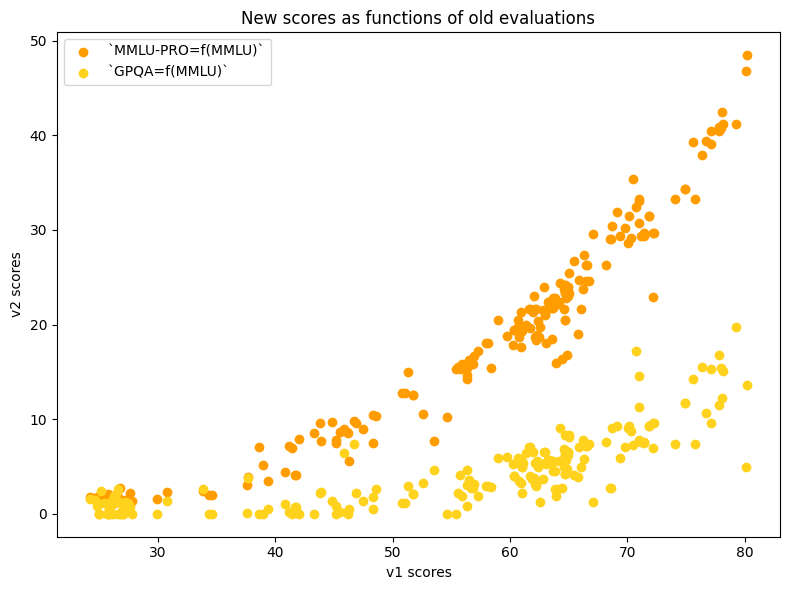

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, (old, new) in enumerate([("MMLU", mmlu_pro), ("MMLU", gpqa)]): #, ("GSM8K", math)
    yval =  merged_data[new]
    xval = merged_data[old]
    ax.scatter(xval, yval, c=colors[i], label=f"`{new}=f({old})`")

ax.set_title(f"New scores as functions of old evaluations")
ax.set_ylabel(f'v2 scores')
ax.set_xlabel(f'v1 scores')

plt.tight_layout()
plt.legend()
#plt.grid(True)
plt.show()

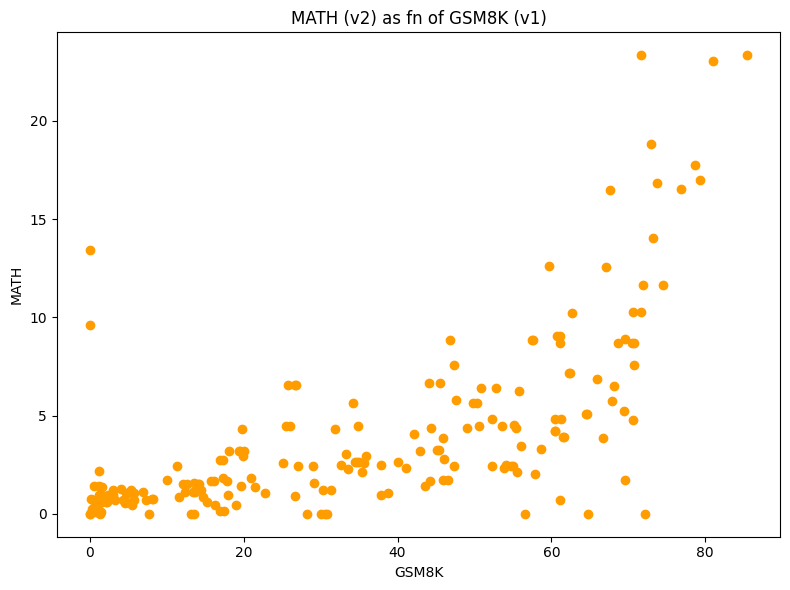

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

for (old, new) in [("GSM8K", math)]:
    yval =  merged_data[new]
    xval = merged_data[old]
    ax.scatter(xval, yval, c=colors[0], label=f"`{new}=f({old})`")

ax.set_title(f"MATH (v2) as fn of GSM8K (v1)")
ax.set_ylabel(f'MATH')
ax.set_xlabel(f'GSM8K')

plt.tight_layout()
#plt.legend()
#plt.grid(True)
plt.show()

- MMLU and MMLU_Pro are well correlated - overall, a model with High MMLU has a high MMLU Pro score
- For MATH vs GSM8K, we identify 3 groups:
    - "High" MATH score, very low v1 score (2 outliers): possible overfitting on MATH, or , more likely, one of these models with issues with eos tokens on GSM8K
    - Correlation between v2 and v1 score (most models)
    - Low MATH score, high GSM8K score: likely overfitting on GSM8K 

# Ranking Analysis between V1 and V2

In [21]:
# Extracting the relevant information for ranking comparison between v1 and v2
# We actually want to merge with correct precision if possible, else merge on what's available
v2_rank_data = data_v2[['fullname', 'Average ⬆️']]
v1_rank_data = data_v1[['fullname', 'Average ⬆️']]

In [22]:
# Renaming columns for clarity
v2_rank_data = v2_rank_data.rename(columns={'Average ⬆️': 'v2_score'})
v1_rank_data = v1_rank_data.rename(columns={'Average ⬆️': 'v1_score'})

In [23]:
# Merging the two dataframes on 'eval_name'
merged_rank_data = pd.merge(v1_rank_data, v2_rank_data, on='fullname', how='inner')

In [24]:
merged_rank_data = merged_rank_data.drop_duplicates(subset=['fullname']).dropna()

In [25]:
merged_rank_data

fullname   v1_score   v2_score
0                                    01-ai/Yi-1.5-34B  73.504618  25.812197
1                                01-ai/Yi-1.5-34B-32K  60.700977  26.787600
2                               01-ai/Yi-1.5-34B-Chat  74.823763  33.076818
3                                     01-ai/Yi-1.5-6B  61.566520  16.778059
5                                01-ai/Yi-1.5-6B-Chat  66.167303  22.405532
..                                                ...        ...        ...
204      togethercomputer/RedPajama-INCITE-Base-3B-v1  38.537852   5.645099
205      togethercomputer/RedPajama-INCITE-Chat-3B-v1  39.527194   4.950649
206  togethercomputer/RedPajama-INCITE-Instruct-3B-v1  39.055049   5.877290
207                 upstage/SOLAR-10.7B-Instruct-v1.0  74.200698  19.961989
208                          upstage/SOLAR-10.7B-v1.0  66.037836  17.072003

[166 rows x 3 columns]

In [26]:
# Calculating rank for v1 and v2 based on scores
merged_rank_data['v1_rank'] = merged_rank_data['v1_score'].rank(ascending=False)
merged_rank_data['v2_rank'] = merged_rank_data['v2_score'].rank(ascending=False)

In [27]:
# Calculating rank change and sort
merged_rank_data['rank_change'] = merged_rank_data['v2_rank'] - merged_rank_data['v1_rank']

merged_rank_data = merged_rank_data.sort_values('rank_change')
merged_rank_data = merged_rank_data.dropna()

In [28]:
# Filter to show only top 10 improvements and top 10 declines
show_all = False

if show_all:
    # Show all changes
    top_changes = merged_rank_data
else:
    # Sort by rank change
    merged_rank_data_sorted = merged_rank_data.sort_values('rank_change')
    # Concatenate top 10 declines and top 10 improvements
    top_changes = pd.concat([merged_rank_data_sorted.head(10), merged_rank_data_sorted.tail(10)])

# Create a column for detailed rank change information
top_changes['rank_change_info'] = top_changes.apply(
    lambda x: f"{int(x['v1_rank'])} → {int(x['v2_rank'])}", axis=1
)

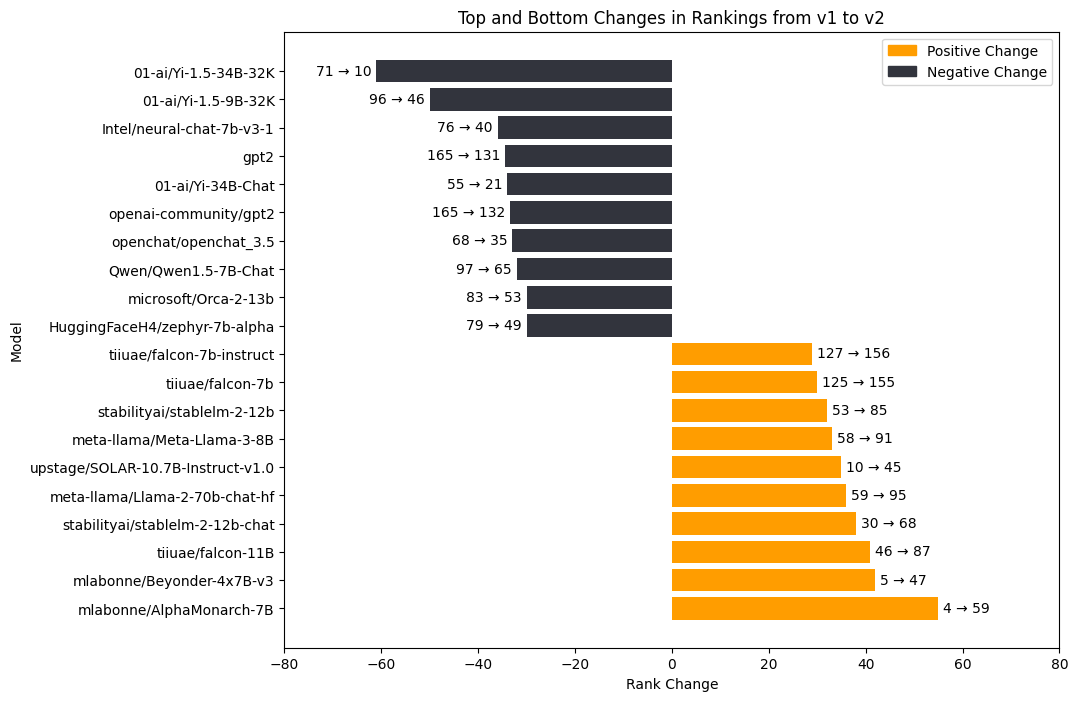

In [29]:
# Invert the order to show declines first
top_changes_sorted = top_changes.sort_values('rank_change', ascending=True)

# Positive changes should be green, and negative changes should be red
colors = ['#FF9D00' if x > 0 else '#32343D' for x in top_changes_sorted['rank_change']]

# Plotting the top and bottom rank changes with corrected colors and adding a legend
plt.figure(figsize=(10, 8))
bars = plt.barh(top_changes_sorted['fullname'], top_changes_sorted['rank_change'], color=colors)

# Annotating the bars with rank change details
for bar, rank_change_info in zip(bars, top_changes_sorted['rank_change_info']):
    plt.text(
        bar.get_width() + (1 if bar.get_width() > 0 else -1), 
        bar.get_y() + bar.get_height() / 2, 
        rank_change_info,
        va='center', ha='left' if bar.get_width() > 0 else 'right', 
        fontsize=10, color='black'
    )

# Adding a legend
green_patch = mpatches.Patch(color='#FF9D00', label='Positive Change')
red_patch = mpatches.Patch(color='#32343D', label='Negative Change')
plt.legend(handles=[green_patch, red_patch])

plt.xlabel('Rank Change')
plt.ylabel('Model')
plt.title('Top and Bottom Changes in Rankings from v1 to v2')
plt.xlim(-80, 80)
plt.gca().invert_yaxis()  # Invert y-axis to show declines first
plt.show()

# Params and Performance

In [30]:
full=False

In [31]:
threshold_1 = datetime(2023, 10, 1, tzinfo=timezone.utc)
threshold_2 = datetime(2023, 12, 1, tzinfo=timezone.utc)
threshold_3 = datetime(2024, 2, 1, tzinfo=timezone.utc)
threshold_4 = datetime(2024, 5, 1, tzinfo=timezone.utc)

In [32]:
# Calculate the mean performance score across the tasks for both versions
data_v1['median_score_v1'] = data_v1[tasks_v1].median(axis=1)
data_v2['median_score_v2'] = data_v2[tasks_v2].median(axis=1)

# Extract the necessary columns for plotting
if full:
    v1_data = data_v1[['fullname', '#Params (B)', 'median_score_v1', 'date']]
    v2_data = data_v2[['fullname', '#Params (B)', 'median_score_v2', 'date']]

    # Merge the data on fullname
    merged_data = pd.merge(v1_data, v2_data, on=['fullname', 'date', "#Params (B)"], how='outer')
else:
    v1_data = data_v1[['fullname', '#Params (B)', 'median_score_v1']]
    v2_data = data_v2[['fullname', '#Params (B)', 'median_score_v2', 'date']]

    # Merge the data on fullname
    merged_data = pd.merge(v1_data, v2_data, on=['fullname', "#Params (B)"], how='outer')

In [33]:
merged_data.dropna(subset="date", inplace=True)

merged_data["date"] = pd.to_datetime(merged_data["date"])
for row in merged_data["date"]:
    if not isinstance(row, pd._libs.tslibs.timestamps.Timestamp) or not isinstance(row, datetime):
        print(row, type(row))

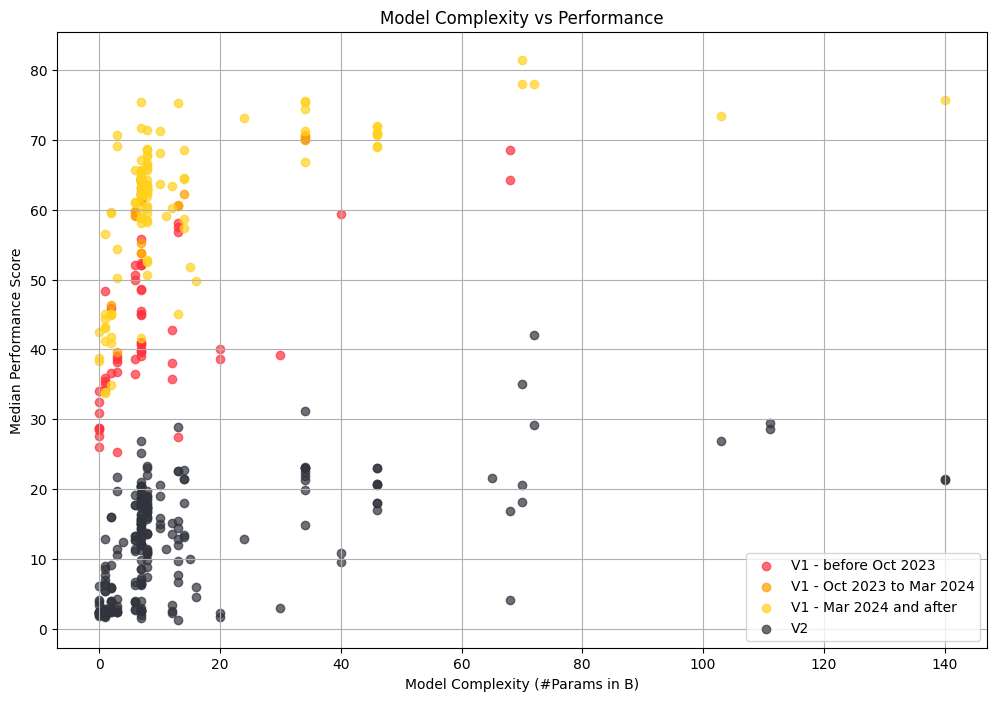

In [34]:
# Plot the relationship between model complexity and performance for both versions
colors = ['#FF323D', "#FF9D00", "#FFD21E", "#32343D", ] 
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data['#Params (B)'][merged_data['date'] < threshold_1], 
    merged_data['median_score_v1'][merged_data['date'] < threshold_1], 
    label='V1 - before Oct 2023', alpha=0.7, color=colors[0])
plt.scatter(
    merged_data['#Params (B)'][threshold_1 < merged_data['date']][merged_data['date'] < threshold_2], 
    merged_data['median_score_v1'][threshold_1 < merged_data['date']][merged_data['date'] < threshold_2], 
    label='V1 - Oct 2023 to Mar 2024', alpha=0.7, color=colors[1])
plt.scatter(
    merged_data['#Params (B)'][merged_data['date'] > threshold_2], 
    merged_data['median_score_v1'][merged_data['date'] > threshold_2], 
    label='V1 - Mar 2024 and after', 
    alpha=0.7, color=colors[2])
plt.scatter(
    merged_data['#Params (B)'],
    merged_data['median_score_v2'], label='V2', alpha=0.7, color=colors[3])
plt.xlabel('Model Complexity (#Params in B)')
plt.ylabel('Median Performance Score')
plt.title('Model Complexity vs Performance')
plt.legend()
plt.grid(True)
plt.show()

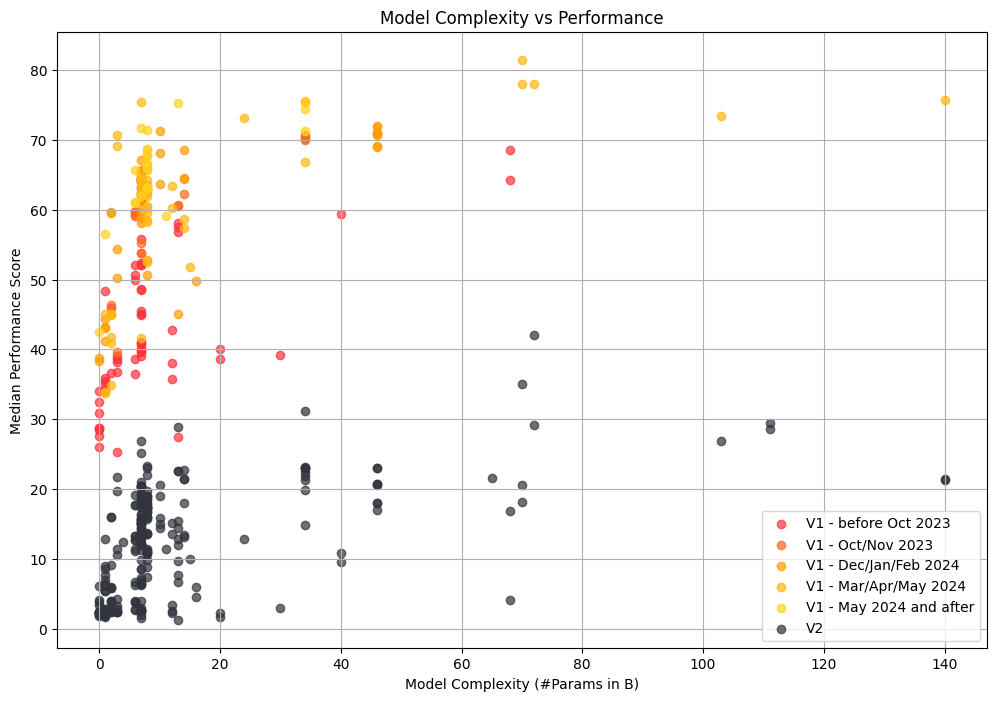

In [35]:
# Plot the relationship between model complexity and performance for both versions
colors = ['#FF323D', "#FF681F", "#FF9D00", "#FFB80F", "#FFD21E", "#32343D", ] 
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data['#Params (B)'][merged_data['date'] < threshold_1], 
    merged_data['median_score_v1'][merged_data['date'] < threshold_1], 
    label='V1 - before Oct 2023', alpha=0.7, color=colors[0])
plt.scatter(
    merged_data['#Params (B)'][threshold_1 < merged_data['date']][merged_data['date'] < threshold_2], 
    merged_data['median_score_v1'][threshold_1 < merged_data['date']][merged_data['date'] < threshold_2], 
    label='V1 - Oct/Nov 2023', alpha=0.7, color=colors[1])
plt.scatter(
    merged_data['#Params (B)'][threshold_2 < merged_data['date']][merged_data['date'] < threshold_3], 
    merged_data['median_score_v1'][threshold_2 < merged_data['date']][merged_data['date'] < threshold_3], 
    label='V1 - Dec/Jan/Feb 2024', alpha=0.7, color=colors[2])
plt.scatter(
    merged_data['#Params (B)'][threshold_3 < merged_data['date']][merged_data['date'] < threshold_4], 
    merged_data['median_score_v1'][threshold_3 < merged_data['date']][merged_data['date'] < threshold_4], 
    label='V1 - Mar/Apr/May 2024', alpha=0.7, color=colors[3])
plt.scatter(
    merged_data['#Params (B)'][merged_data['date'] > threshold_4], 
    merged_data['median_score_v1'][merged_data['date'] > threshold_4], 
    label='V1 - May 2024 and after', 
    alpha=0.7, color=colors[4])
#plt.scatter(merged_data['#Params (B)_x'], merged_data['median_score_v1'], label='V1', alpha=0.7, color=colors[0])
plt.scatter(
    merged_data['#Params (B)'],
    merged_data['median_score_v2'], label='V2', alpha=0.7, color=colors[-1])
plt.xlabel('Model Complexity (#Params in B)')
plt.ylabel('Median Performance Score')
plt.title('Model Complexity vs Performance')
plt.legend()
plt.grid(True)
plt.show()